In [1]:
import pandas as pd

In [2]:
# load json file to df
df0 = pd.read_json('./data/StreamingHistory0.json')
df1 = pd.read_json('./data/StreamingHistory1.json')

# combine df
df = pd.concat([df0, df1])
df.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-01 00:00,Chris Classic,Here We Go,124285
1,2022-12-01 00:04,Younha,Oort Cloud,206626
2,2022-12-01 00:08,LOONA,Star,11012
3,2022-12-01 00:08,TAEYEON,Can't Control Myself,181600
4,2022-12-01 00:13,BTS,MIC Drop (Steve Aoki Remix) - Full Length Edition,307675


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16700 entries, 0 to 6699
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   endTime     16700 non-null  object
 1   artistName  16700 non-null  object
 2   trackName   16700 non-null  object
 3   msPlayed    16700 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 652.3+ KB


In [9]:
df['endTime'] = pd.to_datetime(df['endTime'])
df.head()

,endTime,artistName,trackName,msPlayed
0,2022-12-01 00:00:00,Chris Classic,Here We Go,124285
1,2022-12-01 00:04:00,Younha,Oort Cloud,206626
2,2022-12-01 00:08:00,LOONA,Star,11012
3,2022-12-01 00:08:00,TAEYEON,Can't Control Myself,181600
4,2022-12-01 00:13:00,BTS,MIC Drop (Steve Aoki Remix) - Full Length Edition,307675


In [10]:
# change msPlayed to seconds played
df['sPlayed'] = df['msPlayed'] / 1000
df.head()

,endTime,artistName,trackName,msPlayed,sPlayed
0,2022-12-01 00:00:00,Chris Classic,Here We Go,124285,124.285
1,2022-12-01 00:04:00,Younha,Oort Cloud,206626,206.626
2,2022-12-01 00:08:00,LOONA,Star,11012,11.012
3,2022-12-01 00:08:00,TAEYEON,Can't Control Myself,181600,181.600
4,2022-12-01 00:13:00,BTS,MIC Drop (Steve Aoki Remix) - Full Length Edition,307675,307.675


In [13]:
# keeping only 2023 data
df = df[df['endTime'].dt.year == 2023]

### Time series of my streaming data

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

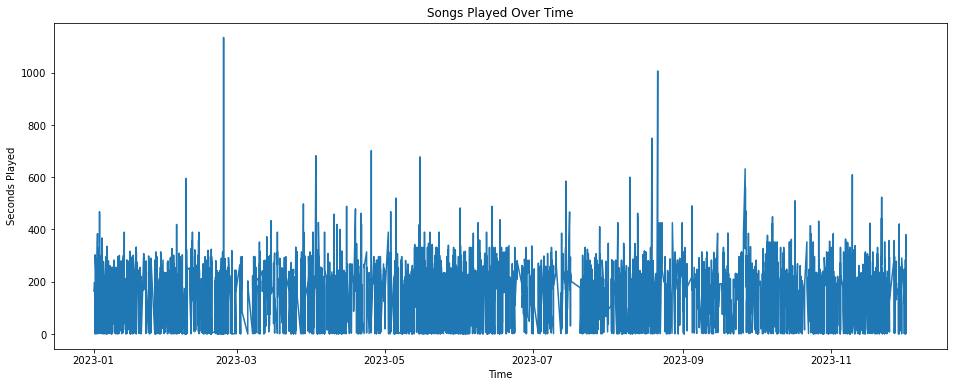

In [14]:
# plot time series line graph of songs
plt.figure(figsize=(16, 6))
plt.plot(df['endTime'], df['sPlayed'])
plt.title('Songs Played Over Time')
plt.xlabel('Time')
plt.ylabel('Seconds Played')
plt.show()


In [53]:
df['date']  = df['endTime'].dt.date
temp = df.groupby('date')['sPlayed'].sum().reset_index()
temp.head()

,date,sPlayed
0,2023-01-01,1872.629
1,2023-01-02,4344.698
2,2023-01-03,16341.292
3,2023-01-04,18755.847
4,2023-01-05,3433.348


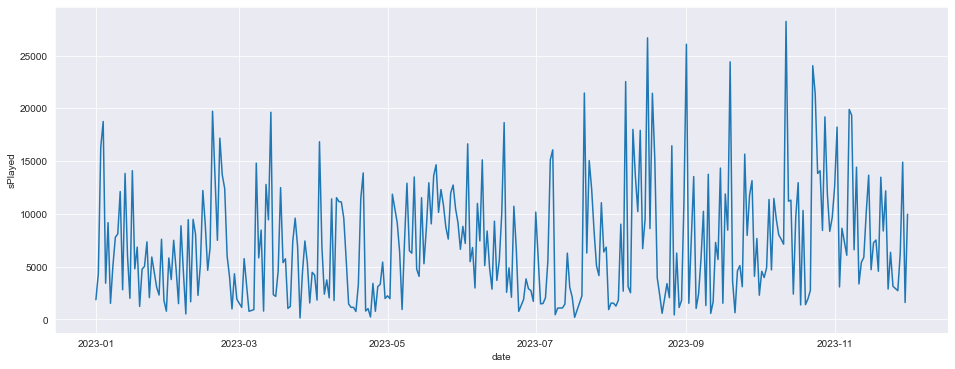

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=(16, 6))
sns.lineplot(x='date', y='sPlayed', data=temp)
plt.show()

the time series looks like having highs and lows, so it is better to use a moving average to smooth the data.

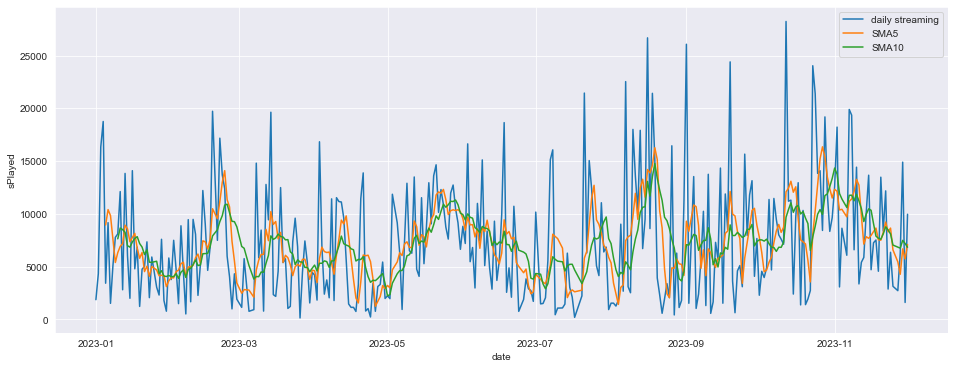

In [57]:
temp['SMA5'] = temp['sPlayed'].rolling(5).mean()
temp['SMA10'] = temp['sPlayed'].rolling(10).mean()
temp['SMA30'] = temp['sPlayed'].rolling(30).mean()

plt.figure(figsize=(16, 6))
sns.lineplot(x='date', y='sPlayed', data=temp)
sns.lineplot(x='date', y='SMA5', data=temp)
sns.lineplot(x='date', y='SMA10', data=temp)
plt.legend(['daily streaming', 'SMA5', 'SMA10'])
plt.show()


In [21]:
# plot monthly streaming time
df['month'] = df['endTime'].dt.month
df['year'] = df['endTime'].dt.year
temp = df.groupby(['year', 'month'])['sPlayed'].sum().reset_index()
temp.head()


,year,month,sPlayed
0,2023,1,186713.316
1,2023,2,188080.738
2,2023,3,162735.963
3,2023,4,153528.245
4,2023,5,264548.945


Monthly streaming plot

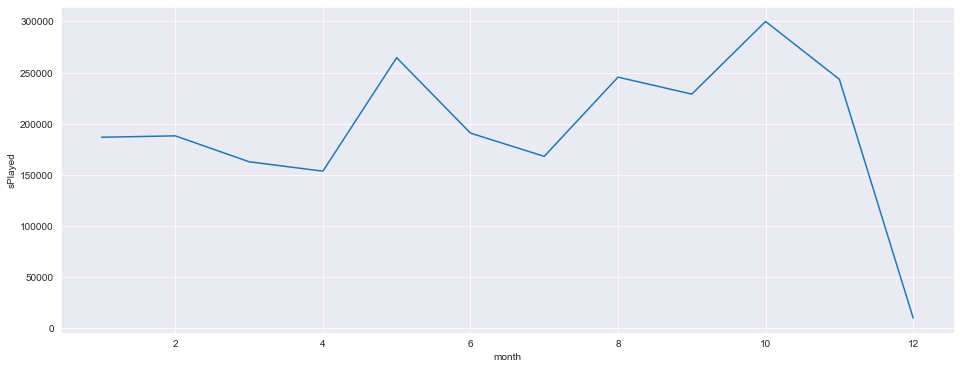

In [22]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='month', y='sPlayed', data=temp)
plt.show()

december drop is because this data was collected in start of december, so very little straming data was available

### How many time did I spent listening to music?
in terms of days each month

In [27]:
df.head()

,endTime,artistName,trackName,msPlayed,sPlayed,date,month,year,hours
2393,2023-01-01 07:35:00,WJSN,As You Wish,195667,195.667,2023-01-01,1,2023,0.054352
2394,2023-01-01 07:38:00,WJSN,As You Wish,162332,162.332,2023-01-01,1,2023,0.045092
2395,2023-01-01 09:18:00,LE SSERAFIM,No Celestial,166491,166.491,2023-01-01,1,2023,0.046248
2396,2023-01-01 14:29:00,WJSN,As You Wish,195667,195.667,2023-01-01,1,2023,0.054352
2397,2023-01-01 14:32:00,WJSN,As You Wish,195667,195.667,2023-01-01,1,2023,0.054352


<AxesSubplot:xlabel='month'>

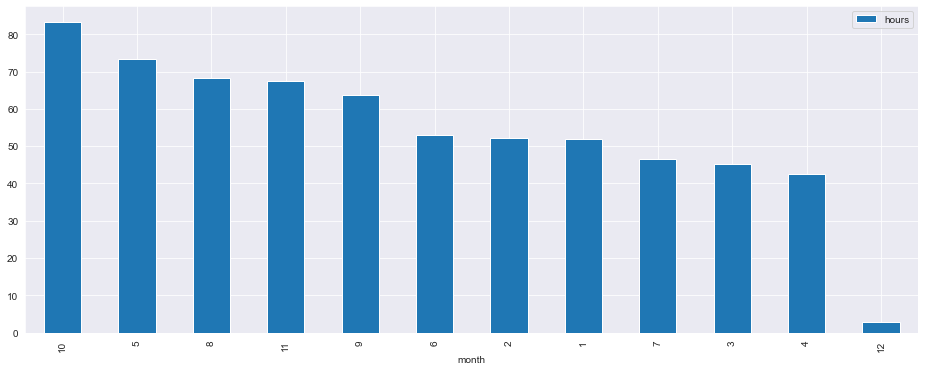

In [34]:
temp = df.groupby('month')['hours'].sum().reset_index()
temp.sort_values(by='hours', ascending=False).plot.bar(x='month', y='hours', figsize=(16, 6))

In [38]:
temp['days'] = temp['hours'] / 24
temp[['days','month']].sort_values(by='days', ascending=False)

,days,month
9,3.471614,10
4,3.061909,5
7,2.841416,8
10,2.816787,11
8,2.649442,9
5,2.207954,6
1,2.176860,2
0,2.161034,1
6,1.944642,7
2,1.883518,3


the most time I spent streaming music was october, I sepnt almost 3.5 days listening to music

### How many songs did I listen to?

In [39]:
len(set(df['trackName'].tolist()))

1757

### My top 10 most repeated songs in 2023

In [43]:
temp = df.groupby('trackName')['sPlayed'].sum().reset_index()
temp.sort_values(by='sPlayed',ascending=False).head(10)

,trackName,sPlayed
424,GODS,57405.363
91,BAD BLOOD,49817.499
207,Charismatic,48626.578
296,Ditto,40787.624
999,Rising,31258.123
899,Oort Cloud,30286.718
1237,To My Youth,30222.775
1232,Time of Our Life,29369.972
454,Glow-up,28992.963
1029,SOBER - KR Ver. BIGBANG10 THE CONCERT : 0.TO.1...,27611.240


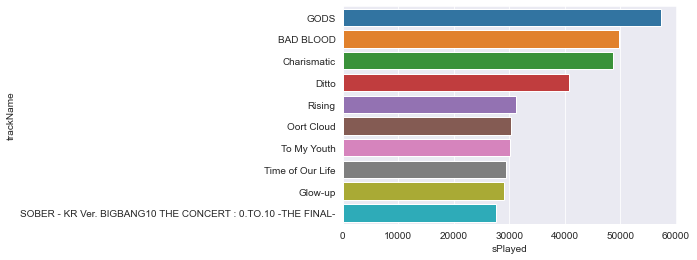

In [47]:
sns.barplot(x='sPlayed', y='trackName', data=temp.sort_values(by='sPlayed',ascending=False).head(10))
plt.show()

only 4 songs exceeded 40000 seconds of streaming which is more than 11 hours. And the most repeated song was GODS by newjeans, with 57000+ seconds of streaming, that is 15.8 hours.

### My top 10 most repeated artists in 2023

In [48]:
temp =  df.groupby('artistName')['sPlayed'].sum().reset_index()
temp.sort_values(by='sPlayed',ascending=False).head(10)

,artistName,sPlayed
204,IU,123806.621
364,NewJeans,114145.558
45,BOL4,84536.154
540,Younha,74652.284
350,NANA,70094.313
205,IVE,66020.322
293,League of Legends,64622.977
281,LE SSERAFIM,58627.240
156,GIRL'S RE:VERSE,56642.089
577,tripleS,56543.198


this is suprsing because none of the top 10 songs are from IU, but she is the most repeated artist. I guess I listened to a lot of her songs, but not repeatedly to one.